2025-05-28 12:42:15,955 - chemgraph.tools.openai_loader - INFO - Loading OpenAI model: gpt-4o-mini
2025-05-28 12:42:15,965 - chemgraph.tools.openai_loader - INFO - Requested model: gpt-4o-mini
2025-05-28 12:42:15,965 - chemgraph.tools.openai_loader - INFO - OpenAI model loaded successfully
2025-05-28 12:42:15,965 - chemgraph.graphs.single_agent - INFO - Constructing geometry optimization graph
2025-05-28 12:42:15,966 - chemgraph.graphs.single_agent - INFO - Graph construction completed


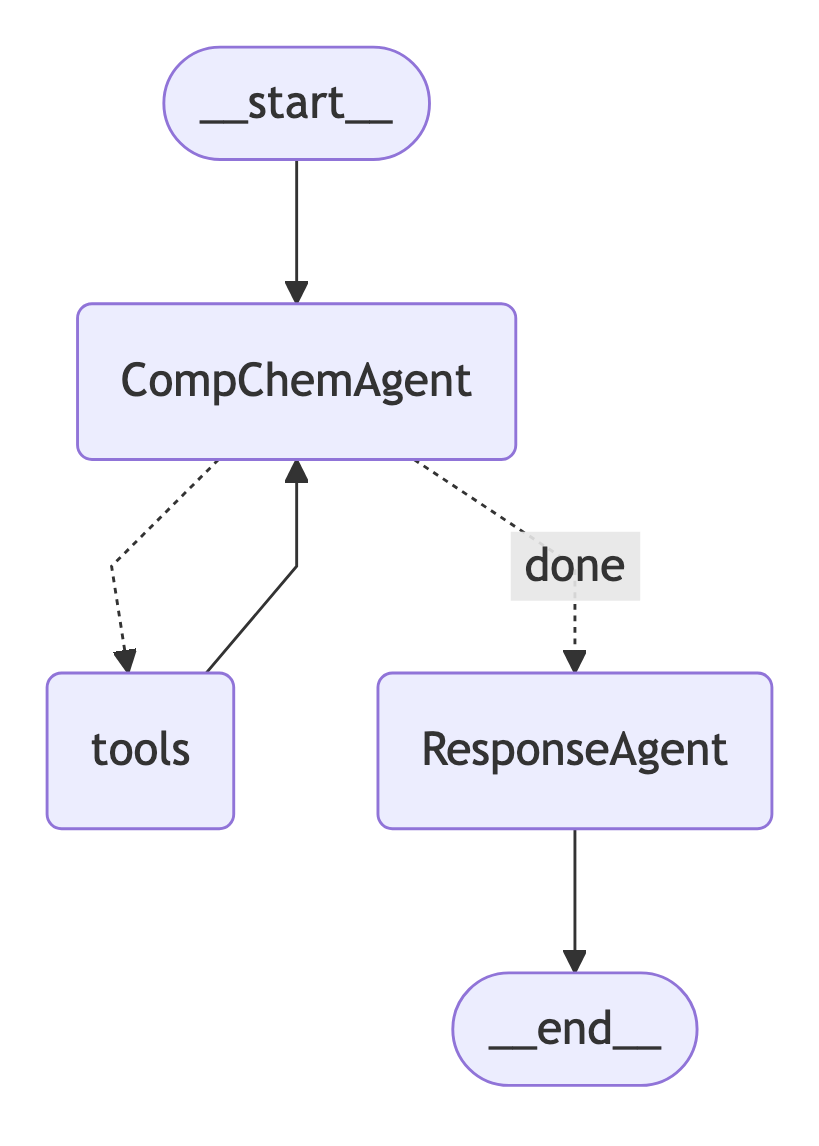

In [1]:
from chemgraph.agent.llm_agent import ChemGraph

workflow_type = "single_agent"

cg = ChemGraph(model_name='gpt-4o-mini', workflow_type = workflow_type, structured_output=True, return_option="state")
cg.visualize()

In [2]:
# Run geometry optimization using default parameters
query = "What is the smiles string caffeine?"
result = cg.run(query, config={"configurable": {"thread_id": 1}})


================================ Human Message =================================

What is the smiles string caffeine?
================================== Ai Message ==================================
Tool Calls:
  molecule_name_to_smiles (call_ZjJnpnWYvlCHAVtosZHwXbat)
 Call ID: call_ZjJnpnWYvlCHAVtosZHwXbat
  Args:
    name: caffeine
================================= Tool Message =================================
Name: molecule_name_to_smiles

"CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
================================== Ai Message ==================================

The SMILES string for caffeine is: **CN1C=NC2=C1C(=O)N(C(=O)N2C)C**.
================================ Human Message =================================

{"answer":"CN1C=NC2=C1C(=O)N(C(=O)N2C)C"}


In [3]:
# Run geometry optimization using MACE MP
query = "What are the vibrational frequencies of carbon dioxide using MACE MP?"
cg.run(query, {"thread_id": 2})

================================ Human Message =================================

What are the vibrational frequencies of carbon dioxide using MACE MP?
================================== Ai Message ==================================
Tool Calls:
  molecule_name_to_smiles (call_QLIbqRQvKeoKRJrspa14lAxc)
 Call ID: call_QLIbqRQvKeoKRJrspa14lAxc
  Args:
    name: carbon dioxide
================================= Tool Message =================================
Name: molecule_name_to_smiles

"C(=O)=O"
================================== Ai Message ==================================
Tool Calls:
  smiles_to_atomsdata (call_b0IEM19M1hwzzOeQD5HdHMsB)
 Call ID: call_b0IEM19M1hwzzOeQD5HdHMsB
  Args:
    smiles: C(=O)=O
================================= Tool Message =================================
Name: smiles_to_atomsdata

{"numbers": [6, 8, 8], "positions": [[4.5556649759108717e-08, 0.5033862641973668, 0.0], [-1.237393800775972, 0.5176981640440148, 0.0], [1.2373937552193337, 0.4890745459797487, 0.0

/opt/anaconda3/envs/cca_env/lib/python3.10/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_indices = torch.load(os.pa

Using Materials Project MACE for MACECalculator with /Users/tpham2/.cache/mace/20231203mace128L1_epoch199model
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.


/opt/anaconda3/envs/cca_env/lib/python3.10/site-packages/mace/calculators/mace.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=de

      Step     Time          Energy          fmax
BFGS:    0 11:59:04      -22.448775        4.816972
BFGS:    1 11:59:04      -22.775942        0.628967
BFGS:    2 11:59:04      -22.779029        0.232180
BFGS:    3 11:59:04      -22.779542        0.006331
================================= Tool Message =================================
Name: run_ase

{"converged": true, "final_structure": {"numbers": [6, 8, 8], "positions": [[-3.327444090645184e-07, 0.5033863101669638, -3.515864805207665e-19], [-1.1743887873197276, 0.5169694215282092, -1.2977719304274348e-19], [1.174389120064148, 0.4898032425259573, -3.6245148231050075e-20]], "cell": [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], "pbc": [false, false, false]}, "simulation_input": {"atomsdata": {"numbers": [6, 8, 8], "positions": [[4.5556649759108717e-08, 0.5033862641973668, 0.0], [-1.237393800775972, 0.5176981640440148, 0.0], [1.2373937552193337, 0.4890745459797487, 0.0]], "cell": null, "pbc": [false, false, false]}, "driver": "

{}

In [4]:
# Incorporate parameters from user's query
query = "Calculate the reaction enthalpy of this reaction: carbon monoxide + water -> carbon dioxide + hydrogen using GFN2 at 400K"
cg.run(query, config={"configurable": {"thread_id": "3"}})

================================ Human Message =================================

Calculate the reaction enthalpy of this reaction: carbon monoxide + water -> carbon dioxide + hydrogen using GFN2 at 400K
================================== Ai Message ==================================
Tool Calls:
  run_ase (call_qgK0TZ3HEgN8T8KwARp5r5aZ)
 Call ID: call_qgK0TZ3HEgN8T8KwARp5r5aZ
  Args:
    params: {'atomsdata': {'numbers': [6, 8, 6, 1], 'positions': [[0, 0, 0], [0, 0, 1.2], [1.2, 0, 0], [0, 1.2, 0]], 'cell': None, 'pbc': None}, 'driver': 'thermo', 'optimizer': 'bfgs', 'calculator': {'calculator_type': 'TBLite', 'method': 'GFN2-xTB'}, 'temperature': 400, 'pressure': 101325.0}
3
{'bond-orders': array([[0.        , 1.25953416, 1.73658932, 0.70443969],
       [1.25953416, 0.        , 0.78029187, 0.01472918],
       [1.73658932, 0.78029187, 0.        , 0.23560845],
       [0.70443969, 0.01472918, 0.23560845, 0.        ]])}
{'bond-orders': array([[0.        , 1.25953416, 1.73658932, 0.70443969

{'messages': [{'content': 'Calculate the reaction enthalpy of this reaction: carbon monoxide + water -> carbon dioxide + hydrogen using GFN2 at 400K',
   'additional_kwargs': {},
   'response_metadata': {},
   'type': 'human',
   'name': 'None',
   'id': '52360b7f-937a-4b9a-b658-d96deab408f1',
   'example': 'False'},
  {'content': '',
   'additional_kwargs': {'tool_calls': [{'id': 'call_qgK0TZ3HEgN8T8KwARp5r5aZ',
      'function': {'arguments': '{"params":{"atomsdata":{"numbers":[6,8,6,1],"positions":[[0,0,0],[0,0,1.2],[1.2,0,0],[0,1.2,0]],"cell":null,"pbc":null},"driver":"thermo","optimizer":"bfgs","calculator":{"calculator_type":"TBLite","method":"GFN2-xTB"},"temperature":400,"pressure":101325.0}}',
       'name': 'run_ase'},
      'type': 'function'}],
    'refusal': 'None'},
   'response_metadata': {'token_usage': {'completion_tokens': '109',
     'prompt_tokens': '3697',
     'total_tokens': '3806',
     'completion_tokens_details': {'accepted_prediction_tokens': '0',
      'audio